In [1]:
# Run this notebook with `raincloudplots` kernel

import pandas as pd

## Distribution of clinker_lower_matrix_mean

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.collections as clt

import seaborn as sns
sns.set(style="whitegrid",font_scale=2)

import ptitprince as pt

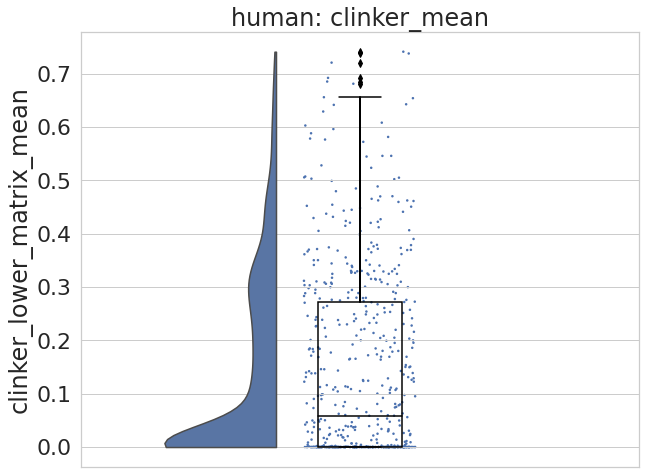

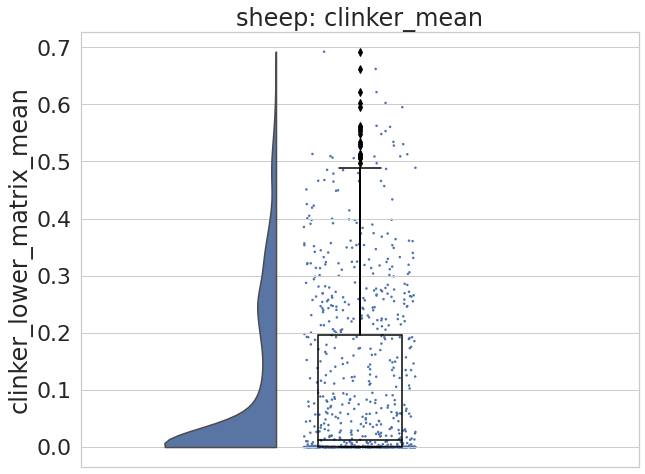

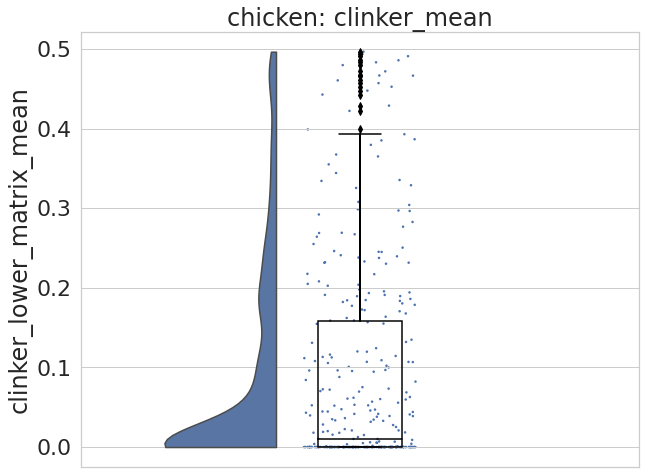

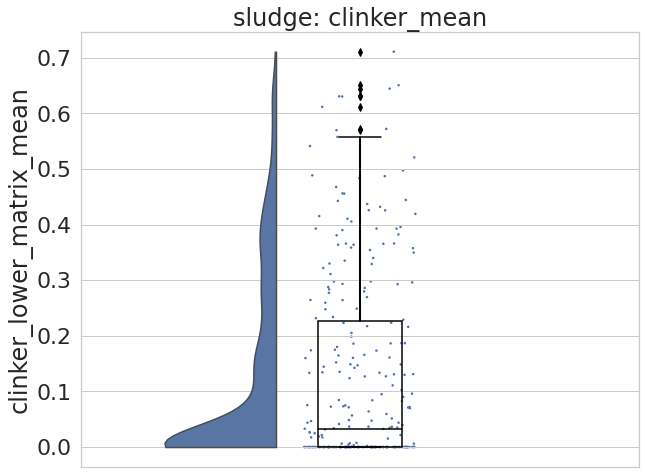

In [3]:
# plot rainclouds
for env in ["human", "sheep", "chicken", "sludge"]:

    df_mean = pd.read_csv(f"{env}/bigscape_family_and_clinker_lower_matrix_mean.tsv", sep='\t')

    f, ax = plt.subplots(figsize=(10, 8))
    dy="clinker_lower_matrix_mean"; dx=None; ort="v"; pal = sns.color_palette(n_colors=1)

    ax=pt.half_violinplot( x = dx, y = dy, data = df_mean, palette = pal, bw = .20, cut = 0.,
                          scale = "area", width = .4, inner = None, orient = ort)

    ax=sns.stripplot( x = dx, y = dy, data = df_mean, palette = pal, edgecolor = "white",
                     size = 2.5, jitter = 1, zorder = 0, orient = ort, ax = ax )
    ax=sns.boxplot( x = dx, y = dy, data = df_mean, color = "black", width = .15, zorder = 10,\
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
                   saturation = 1, orient = ort)

    plt.title(f"{env}: clinker_mean")

## Selection of BiG-SCAPE clusters

In [4]:
import random

df_upsetplot = pd.read_csv("human/df_upsetplot.tsv", sep='\t')
df_upsetplot

,Family_Number,hicanu,metaflye,hifiasm-meta,unmapped_reads,Partial/Complete,clinker_lower_matrix_mean,BiGSCAPE_class
0,6,True,False,False,False,True,NaN,RiPPs
1,26,True,True,True,False,False,0.315401,RiPPs
2,28,True,True,False,False,False,0.150217,RiPPs
3,30,True,False,False,False,True,0.112665,RiPPs
4,31,True,True,True,False,False,0.173815,RiPPs
...,...,...,...,...,...,...,...,...
1027,3284,False,False,False,True,True,NaN,Others
1028,3285,False,False,False,True,True,NaN,RiPPs
1029,3286,False,False,False,True,True,NaN,Others
1030,unmapped_reads.SRR15275213.1619327.region001,False,False,False,True,True,NaN,RiPPs


In [5]:
HIFIASM_META = True
METAFLYE = True
HICANU = True
UNMAPPED_READS = False

#lower_bound, upper_bound = 0.0,  0.0000001
#lower_bound, upper_bound = 0.0000001, 0.1
#lower_bound, upper_bound = 0.1, 0.2
lower_bound, upper_bound = 0.2, 0.3
#lower_bound, upper_bound = 0.3, 0.4
#lower_bound, upper_bound = 0.4, 0.5
#lower_bound, upper_bound = 0.5, 0.6
#lower_bound, upper_bound = 0.6, 0.7

selected_family_number_list = []

counter = 0
for index, row in df_upsetplot.iterrows():
    if ((row['hicanu'] == HICANU) and (row['metaflye'] == METAFLYE) and (row['hifiasm-meta'] == HIFIASM_META) and (row['unmapped_reads'] == UNMAPPED_READS)):
        counter += 1
        if not pd.isna(row['clinker_lower_matrix_mean']):
            if ((row['clinker_lower_matrix_mean'] >= lower_bound) and (row['clinker_lower_matrix_mean'] < upper_bound)):
                selected_family_number_list.append(str(int(row['Family_Number'])))
                
print(f"Count of selected family numbers: {len(selected_family_number_list)}")
print("Randomly selected 5 family numbers from above list are:") 
if len(selected_family_number_list) < 5:
    print(selected_family_number_list)
else:
    print(random.sample(selected_family_number_list, 5))

print("counter ", counter)

Count of selected family numbers: 62
Randomly selected 5 family numbers from above list are:
['2078', '1012', '625', '894', '959']
counter  433
